# Olist EXPLORATORY DATA ANALYSIS (EDA)

## 1. Цели этапа:

- Понять распределения ключевых фич
- Найти аномалии и ограничения в данных
- Найти зависимости между доставкой и отзывами
- Сформулировать 1–2 гипотезы для A/B теста

## 2. Обзор данных

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
orders_features = pd.read_csv('../data/orders_features.csv', sep=';')

In [5]:
orders_features.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,items_count,total_price,total_freight,max_payment_installments,total_payment_value,avg_review_score,reviews_count,delivery_days,total_amount_olist,has_review,is_late_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,2017-10-10 21:25:13,1.0,29.99,8.72,1.0,38.71,4.0,1.0,8.0,38.71,1,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00,2018-08-07 15:27:45,1.0,118.70,22.76,1.0,141.46,4.0,1.0,14.0,141.46,1,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00,2018-08-17 18:06:29,1.0,159.90,19.22,3.0,179.12,5.0,1.0,9.0,179.12,1,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15 00:00:00,2017-12-02 00:28:42,1.0,45.00,27.20,1.0,72.20,5.0,1.0,13.0,72.20,1,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26 00:00:00,2018-02-16 18:17:02,1.0,19.90,8.72,1.0,28.62,5.0,1.0,3.0,28.62,1,0


In [6]:
orders_features.shape

(99441, 17)

In [8]:
orders_features.describe()

,items_count,total_price,total_freight,max_payment_installments,total_payment_value,avg_review_score,reviews_count,delivery_days,total_amount_olist,has_review,is_late_delivery
count,98666.000000,98666.000000,98666.000000,99440.000000,99440.000000,98673.000000,98673.000000,96476.000000,98666.000000,99441.000000,99441.000000
mean,1.141731,137.754076,22.823562,2.930521,160.990267,4.086793,1.005584,12.517548,160.577638,0.992277,0.078710
std,0.538452,210.645145,21.650909,2.715685,221.951257,1.346274,0.075060,9.550516,220.466087,0.087542,0.269287
min,1.000000,0.850000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,9.590000,0.000000,0.000000
25%,1.000000,45.900000,13.850000,1.000000,62.010000,4.000000,1.000000,7.000000,61.980000,1.000000,0.000000
50%,1.000000,86.900000,17.170000,2.000000,105.290000,5.000000,1.000000,10.000000,105.290000,1.000000,0.000000
75%,1.000000,149.900000,24.040000,4.000000,176.970000,5.000000,1.000000,16.000000,176.870000,1.000000,0.000000
max,21.000000,13440.000000,1794.960000,24.000000,13664.080000,5.000000,3.000000,210.000000,13664.080000,1.000000,1.000000


In [11]:
orders_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_estimated_delivery_date  99441 non-null  object 
 5   order_delivered_customer_date  96476 non-null  object 
 6   items_count                    98666 non-null  float64
 7   total_price                    98666 non-null  float64
 8   total_freight                  98666 non-null  float64
 9   max_payment_installments       99440 non-null  float64
 10  total_payment_value            99440 non-null  float64
 11  avg_review_score               98673 non-null  float64
 12  reviews_count                  98673 non-null 

In [12]:
orders_features.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_estimated_delivery_date       0
order_delivered_customer_date    2965
items_count                       775
total_price                       775
total_freight                     775
max_payment_installments            1
total_payment_value                 1
avg_review_score                  768
reviews_count                     768
delivery_days                    2965
total_amount_olist                775
has_review                          0
is_late_delivery                    0
dtype: int64

In [21]:
orders_features \
    .query('order_delivered_customer_date.isnull()') \
    .groupby('order_status', as_index=False) \
    .agg({'order_id':'count'}) \
    .rename(columns={'order_id':'count_orders'}) \
    .sort_values('count_orders')

,order_status,count_orders
0,approved,2
2,created,5
3,delivered,8
5,processing,301
4,invoiced,314
7,unavailable,609
1,canceled,619
6,shipped,1107


Большинство заказов с отсутствующей фактической датой доставки имеют статус 'shipped'. Это объясняется тем, что данные заказы ещё не были доставлены клиенту на момент выгрузки данных.

Таким образом, отсутствие даты доставки в данном случае не является ошибкой данных и не требует дополнительной очистки.

Также обнаружено 8 заказов, которые были доставлены, но не имеют фактической даты доставки до клиента, рассмотрим их подробнее:

In [25]:
orders_features \
    .query('order_status == "delivered" and order_delivered_customer_date.isnull()')

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,items_count,total_price,total_freight,max_payment_installments,total_payment_value,avg_review_score,reviews_count,delivery_days,total_amount_olist,has_review,is_late_delivery
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-12-18 00:00:00,NaN,1.0,117.30,17.53,3.0,134.83,5.0,1.0,NaN,134.83,1,0
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-07-16 00:00:00,NaN,1.0,329.00,25.24,1.0,354.24,5.0,1.0,NaN,354.24,1,0
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-30 00:00:00,NaN,1.0,139.00,19.07,3.0,158.07,5.0,1.0,NaN,158.07,1,0
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-30 00:00:00,NaN,1.0,139.00,19.07,1.0,158.07,5.0,1.0,NaN,158.07,1,0
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-24 00:00:00,NaN,1.0,188.99,15.63,4.0,204.62,5.0,1.0,NaN,204.62,1,0
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-06-23 00:00:00,NaN,1.0,179.00,15.00,4.0,194.00,5.0,1.0,NaN,194.00,1,0
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-26 00:00:00,NaN,1.0,110.99,9.13,5.0,120.12,1.0,1.0,NaN,120.12,1,0
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-07-19 00:00:00,NaN,1.0,45.90,9.07,1.0,54.97,5.0,1.0,NaN,54.97,1,0


В данных обнаружено 8 заказов со статусом 'delivered', у которых отсутствует фактическая дата доставки до клиента.

Все указанные заказы имеют отзывы клиентов, что с высокой вероятностью свидетельствует о том, что заказы были получены, а отсутствие даты доставки является следствием ошибки или потери данных.

Распределение оценок по данным заказам:
- 7 заказов с оценкой 5
- 1 заказ с оценкой 1

Учитывая малое количество таких наблюдений, они не оказывают существенного влияния на общий анализ и не требуют отдельной корректировки.

## 3. Анализ доставки

In [5]:
df_delivered = orders_features[
    (orders_features['order_status'] == 'delivered') &
    (orders_features['delivery_days'].notna())
]

In [5]:
df_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,items_count,total_price,total_freight,max_payment_installments,total_payment_value,avg_review_score,reviews_count,delivery_days,total_amount_olist,has_review,is_late_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,2017-10-10 21:25:13,1.0,29.99,8.72,1.0,38.71,4.0,1.0,8.0,38.71,1,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00,2018-08-07 15:27:45,1.0,118.70,22.76,1.0,141.46,4.0,1.0,14.0,141.46,1,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00,2018-08-17 18:06:29,1.0,159.90,19.22,3.0,179.12,5.0,1.0,9.0,179.12,1,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15 00:00:00,2017-12-02 00:28:42,1.0,45.00,27.20,1.0,72.20,5.0,1.0,13.0,72.20,1,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26 00:00:00,2018-02-16 18:17:02,1.0,19.90,8.72,1.0,28.62,5.0,1.0,3.0,28.62,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-28 00:00:00,2017-03-17 15:08:01,1.0,72.00,13.08,3.0,85.08,5.0,1.0,8.0,85.08,1,0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-03-02 00:00:00,2018-02-28 17:37:56,1.0,174.90,20.10,3.0,195.00,4.0,1.0,22.0,195.00,1,0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-27 00:00:00,2017-09-21 11:24:17,1.0,205.99,65.02,5.0,271.01,5.0,1.0,25.0,271.01,1,0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15 00:00:00,2018-01-25 23:32:54,2.0,359.98,81.18,4.0,441.16,2.0,1.0,17.0,441.16,1,0


Дальнейший анализ сроков доставки буду проводить только для заказов со статусом delivered и известной фактической датой доставки.

<Axes: xlabel='delivery_days'>

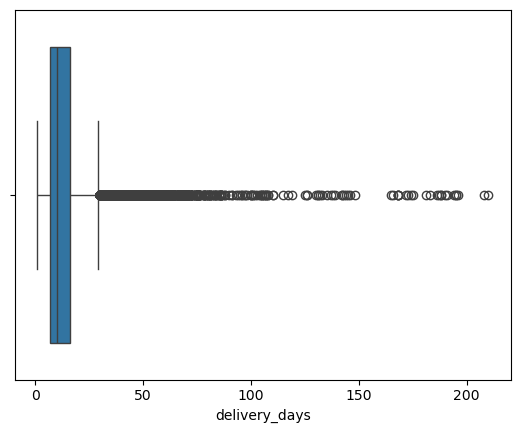

In [6]:
sns.boxplot(x=df_delivered["delivery_days"])

In [15]:
df_delivered.delivery_days.describe()

count    96470.000000
mean        12.517052
std          9.550133
min          1.000000
25%          7.000000
50%         10.000000
75%         16.000000
max        210.000000
Name: delivery_days, dtype: float64

In [27]:
df_delivered["delivery_days"].quantile([0.8, 0.9, 0.95])

0.80    17.0
0.90    23.0
0.95    29.0
Name: delivery_days, dtype: float64

In [29]:
df_delivered.query('delivery_days > 29').sort_values('delivery_days', ascending = False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,items_count,total_price,total_freight,max_payment_installments,total_payment_value,avg_review_score,reviews_count,delivery_days,total_amount_olist,has_review,is_late_delivery
19590,ca07593549f1816d26a572e06dc1eab6,75683a92331068e2d281b11a7866ba44,delivered,2017-02-21 23:31:27,2017-03-22 00:00:00,2017-09-19 14:36:39,1.0,229.90,15.78,1.0,245.68,NaN,NaN,210.0,245.68,0,1
55619,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,delivered,2018-02-23 14:57:35,2018-03-15 00:00:00,2018-09-19 23:24:07,1.0,144.99,17.26,1.0,162.25,2.0,1.0,208.0,162.25,1,1
61610,440d0d17af552815d15a9e41abe49359,7815125148cfa1e8c7fee1ff7974f16c,delivered,2017-03-07 23:59:51,2017-04-07 00:00:00,2017-09-19 15:12:50,1.0,159.90,25.12,2.0,185.02,1.0,1.0,196.0,185.02,1,1
70307,2fb597c2f772eca01b1f5c561bf6cc7b,217906bc11a32c1e470eb7e08584894b,delivered,2017-03-08 18:09:02,2017-04-17 00:00:00,2017-09-19 14:33:17,1.0,239.96,105.19,4.0,345.15,4.0,1.0,195.0,345.15,1,1
89130,285ab9426d6982034523a855f55a885e,9cf2c3fa2632cee748e1a59ca9d09b21,delivered,2017-03-08 22:47:40,2017-04-06 00:00:00,2017-09-19 14:00:04,1.0,429.90,27.75,10.0,457.65,1.0,1.0,195.0,457.65,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29417,29e6f39d57976e61801fbb8f266f30e6,1fe7ee22f6ae1b8dff6b6c83eaf1cd54,delivered,2017-12-11 17:06:20,2018-01-11 00:00:00,2018-01-10 18:28:16,1.0,219.90,18.79,10.0,238.69,5.0,1.0,30.0,238.69,1,0
29393,e7c528a2df211045020684c3db8bddc4,d5d2ae6113c8685d150d34863a5df141,delivered,2017-03-14 12:18:58,2017-04-06 00:00:00,2017-04-13 11:42:08,1.0,32.90,16.05,1.0,48.95,3.0,1.0,30.0,48.95,1,1
90083,5e5235e11bea2c86b1255beb1b7e247a,65be8a984e4ddd88a63a984b4430de9b,delivered,2017-06-14 08:57:30,2017-07-07 00:00:00,2017-07-14 18:56:33,1.0,89.50,16.39,4.0,105.89,1.0,1.0,30.0,105.89,1,1
29305,ba45e84c712135fbb4ebfc999ff5fa42,63fb7a6bde3a209ef4d4f91a4be96798,delivered,2018-03-05 21:27:34,2018-03-26 00:00:00,2018-04-04 17:48:44,1.0,44.99,17.06,1.0,62.05,3.0,1.0,30.0,62.05,1,1


**Вывод:**

Время доставки заказов имеет асимметричное распределение с длинным правым хвостом.

Медианное время доставки составляет 10 дней, при этом 50% заказов доставляются в диапазоне 7-16 дней.

Среднее значение выше медианы, что указывает на наличие редких, но длительных задержек. Максимальное время доставки - 210 дней.

95% заказов доставляются не более чем за 29 дней.

## 4. Анализ опоздания доставок

In [9]:
(df_delivered["is_late_delivery"] == 1).mean() * 100

np.float64(8.112366538820359)

In [7]:
df_delivered.groupby('is_late_delivery',as_index=False).agg({'order_id':'count'})

,is_late_delivery,order_id
0,0,88644
1,1,7826


Доля заказов с опозданием доставки составляет 8%.

## 5. Анализ отзывов

In [6]:
df_delivered['has_review'].mean()

np.float64(0.993303617704986)

99% заказов имеют какую-либо оценку.

In [11]:
df_has_review = df_delivered.query('has_review == 1')

<Axes: xlabel='avg_review_score', ylabel='Count'>

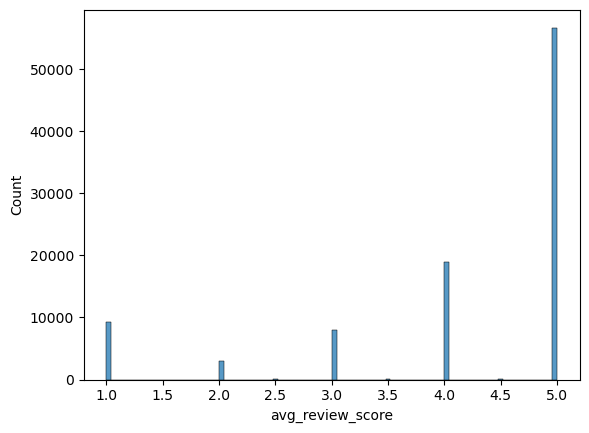

In [41]:
sns.histplot(df_has_review["avg_review_score"])

In [14]:
df_has_review['avg_review_score'].value_counts(normalize=True) * 100

avg_review_score
5.000000    59.167849
4.000000    19.690265
1.000000     9.717816
3.000000     8.259935
2.000000     3.043079
4.500000     0.055310
2.500000     0.031307
3.500000     0.024002
1.500000     0.008349
3.333333     0.001044
4.333333     0.001044
Name: proportion, dtype: float64

Большинство заказов имеют оценки 5 - 59% от общего кол-ва и 4 - 20% от общего кол-ва.

## 7. Анализ доставки и отзывов

**Главный вопрос** - влияет ли опоздание доставки на отзыв?

### Сравнение исходя из оценок:

In [15]:
is_late_delivery_df = df_delivered.query('is_late_delivery == 1')

In [16]:
is_not_late_delivery_df = df_delivered.query('is_late_delivery == 0')

In [18]:
is_late_delivery_df.avg_review_score.describe()

count    7661.000000
mean        2.566506
std         1.657815
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: avg_review_score, dtype: float64

In [19]:
is_not_late_delivery_df.avg_review_score.describe()

count    88163.000000
mean         4.294292
std          1.146029
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_review_score, dtype: float64

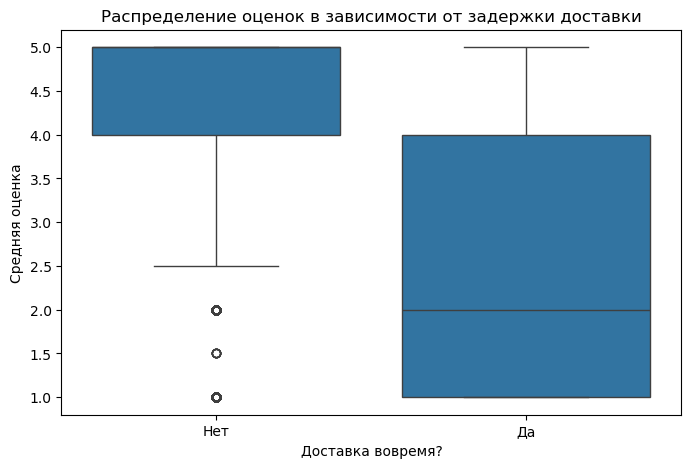

In [39]:
# Добавляем колонку с названием датасета
df1_tmp = is_not_late_delivery_df[["avg_review_score"]].copy()
df1_tmp["Доставка вовремя?"] = "Нет"

df2_tmp = is_late_delivery_df[["avg_review_score"]].copy()
df2_tmp["Доставка вовремя?"] = "Да"

# Объединяем данные
df_combined = pd.concat([df1_tmp, df2_tmp], ignore_index=True)

# Рисуем боксплот
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_combined, x="Доставка вовремя?", y="avg_review_score")
plt.title('Распределение оценок в зависимости от задержки доставки')
plt.ylabel("Средняя оценка")
plt.show()

На основании боксплота и описательной статистики установлено, что заказы, доставленные в пределах ожидаемого срока, имеют медианную оценку, равную 5.

В то же время, заказы с опозданием доставки характеризуются значительно более низкой медианной оценкой — 2.

Несмотря на наличие выбросов в обеих группах, общее распределение оценок демонстрирует устойчивое различие между заказами с опозданием и без опоздания доставки. Выбросы не искажают общую картину и не меняют направления выявленной зависимости.

Полученные результаты указывают на сильную связь между фактом опоздания доставки и снижением пользовательской оценки заказа.

### Сравнение исходя из сроков доставки:

In [34]:
bins = [0, 5, 10, 15, df_delivered['delivery_days'].max()]
labels = ['0-5', '6-10', '11-15', '15+']
df_delivered['delivery_bin'] = pd.cut(df_delivered['delivery_days'], bins=bins, labels=labels, right=True)

C:\Users\днс\AppData\Local\Temp\ipykernel_10128\4243400197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivered['delivery_bin'] = pd.cut(df_delivered['delivery_days'], bins=bins, labels=labels, right=True)


In [35]:
avg_score_by_bin = df_delivered.groupby('delivery_bin')['avg_review_score'].mean()
print(avg_score_by_bin)

delivery_bin
0-5      4.437751
6-10     4.355015
11-15    4.254399
15+      3.604168
Name: avg_review_score, dtype: float64


C:\Users\днс\AppData\Local\Temp\ipykernel_10128\232374020.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_score_by_bin = df_delivered.groupby('delivery_bin')['avg_review_score'].mean()


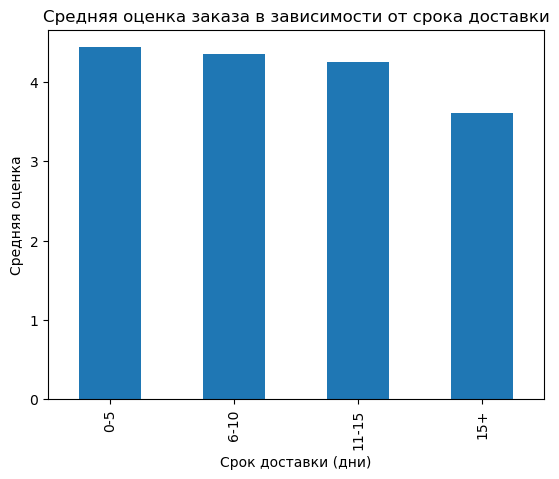

In [36]:
avg_score_by_bin.plot(kind='bar')
plt.title('Средняя оценка заказа в зависимости от срока доставки')
plt.xlabel('Срок доставки (дни)')
plt.ylabel('Средняя оценка')
plt.show()

Исходя из данных четко определяется падение оценки в зависимости от ожидания доставки.

## 8. Анализ оценок и цены за доставку

**Главный вопрос** - влияет ли стоимость доставки на оценки?

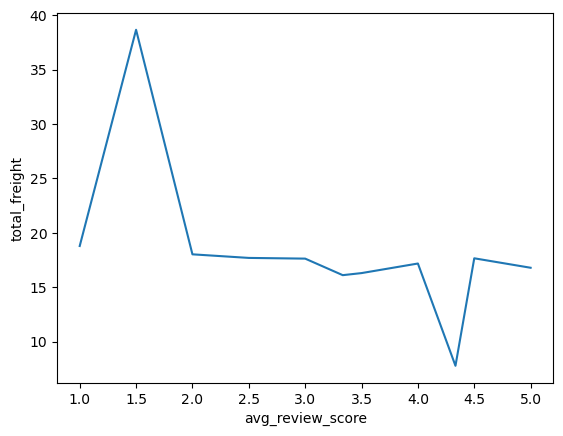

In [45]:
agg = (
    df_delivered.groupby("avg_review_score")["total_freight"]
      .median()
      .reset_index()
)

sns.lineplot(
    data=agg,
    x="avg_review_score",
    y="total_freight"
)

plt.show()


Исходя из графика можно отметить, что стоимость доставки имеет обратную зависимость с оценкой заказа: заказы с низкими оценками характеризуются более высокой медианной ценой доставки.

## 9. Финальные выводы:

1. Большинство заказов доставляется в течение 10 дней.
2. Заказы с опозданием доставки имеют более низкие оценки.
3. Скорость доставки является важным фактором клиентского опыта.

## 10. Гипотезы

Они потребуются нам для АБ тестирования.

H1: Заказы с опозданием доставки получают более низкие оценки, чем заказы без опоздания.

H2: Более высокая стоимость доставки связана с более низкой средней оценкой заказа.